In [155]:
#Importing the necessary packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [156]:
#Loading the loan dataset
loan_inp0 = pd.read_csv("loan.csv")
loan_inp0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [157]:
#Loading the loan dataset dictionary
dict_inp0 = pd.read_excel('Data_Dictionary.xlsx')
dict_inp0

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [158]:
#### Basis the above, removing last 2 rows from the dictionary because those have NaN values
dict_inp1 = dict_inp0[:-2]
dict_inp1

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
110,total_rev_hi_lim,Total revolving high credit/credit limit
111,url,URL for the LC page with listing data.
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...


In [159]:
loan_inp0.shape

(39717, 111)

In [160]:
loan_inp0.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### From above, we observe that there are several columns with all NA values
#### Removing columns that have all NA values

In [161]:
loan_inp1 = loan_inp0.dropna(axis = 1, how='all')
loan_inp1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Checking the new data frame

In [162]:
loan_inp1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Basis more than 60% null entries and applicability of the columns to analysis, we further drop the columns

In [163]:
loan_inp2 = loan_inp1.drop(columns = ['mths_since_last_delinq','mths_since_last_record','next_pymnt_d','id','member_id','title','funded_amnt_inv'])
loan_inp2.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [164]:
loan_inp2.describe()

,loan_amnt,funded_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,11219.443815,10947.713196,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,7456.670694,7187.238670,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,500.000000,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5500.000000,5400.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,9600.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


#### Basis the above, we observe that the values in a few more columns do not show variation 
#### So, we remove them

In [165]:
loan_inp3 = loan_inp2.drop(columns = ['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens'])
loan_inp3.shape

(39717, 43)

In [166]:
loan_inp3.isnull().sum()

loan_amnt                      0
funded_amnt                    0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                       12940
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
initial_list_status            0
out_prncp 

In [167]:
loan_inp3.desc

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                                      NaN
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object

In [168]:
loan_inp3['application_type'].value_counts()


INDIVIDUAL    39717
Name: application_type, dtype: int64

In [169]:
loan_inp3['pymnt_plan'].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [170]:
loan_inp3['delinq_2yrs'].value_counts()                   

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

#### Basis the above, we will remove Application type because all are Individual accounts, desc, url, payment plan and delinq_2 yrs because these are not contributing to the customer defaulting on loan probability

In [171]:
loan_inp4 = loan_inp3.drop(columns = ['desc','url','application_type','out_prncp','out_prncp_inv','purpose','pymnt_plan','delinq_2yrs','total_rec_late_fee','collection_recovery_fee', 'last_pymnt_d','last_credit_pull_d','initial_list_status','revol_util'])
loan_inp4.shape

(39717, 29)

In [172]:
loan_inp4.isnull().sum()
#loan_inp4.issue_d.value_counts()
#loan_inp4.last_pymnt_d.value_counts()
#loan_inp4.emp_title.value_counts()
#loan_inp4.emp_length.value_counts()

loan_amnt                 0
funded_amnt               0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title              2459
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
zip_code                  0
addr_state                0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
total_acc                 0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
total_rec_int             0
recoveries                0
last_pymnt_amnt           0
dtype: int64

#### Basis the above, we understand that there are a few more misssing values - emp_title, emp_length
#### We shall keep them as is until we filter the data basis loan default status and find any correlation for further processing

In [173]:
loan_status_cnt = loan_inp4.loan_status.value_counts()
loan_status_cnt

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [174]:
loan_inp4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_title            37258 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  issue_d              39717 non-null  object 
 13  loan_status          39717 non-null  object 
 14  zip_code             39717 non-null  object 
 15  addr_state           39717 non-null 

### Data standardization
#### Basis the above, we notice that the parameters needed for our analysis would need to be standardized
#### These are - term, int_rate

In [175]:
loan_inp4.term = loan_inp4.term.apply(lambda x: int(x.split()[0]))
loan_inp4.int_rate = loan_inp4.int_rate.apply(lambda x : float(x[:-1]) if x[-1]=="%" else float(x))
loan_inp4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   term                 39717 non-null  int64  
 3   int_rate             39717 non-null  float64
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_title            37258 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  issue_d              39717 non-null  object 
 13  loan_status          39717 non-null  object 
 14  zip_code             39717 non-null  object 
 15  addr_state           39717 non-null 

### Handling missing values
#### From the above, we observe that emp_title, emp_length have missing values

In [176]:
loan_inp4.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [177]:
loan_inp4.emp_length.fillna(loan_inp4.emp_length.mode()[0], inplace = True)
loan_inp4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   term                 39717 non-null  int64  
 3   int_rate             39717 non-null  float64
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_title            37258 non-null  object 
 8   emp_length           39717 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  issue_d              39717 non-null  object 
 13  loan_status          39717 non-null  object 
 14  zip_code             39717 non-null  object 
 15  addr_state           39717 non-null 

In [178]:
loan_inp4.emp_title.value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [179]:
loan_inp4[(loan_inp4.loan_status == "Fully Paid") & (loan_inp4.emp_title == "Bank of America")]

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_amnt
482,7200,7200,36,7.51,224.00,A,A3,Bank of America,10+ years,MORTGAGE,...,12,0,16106,32,8063.919998,8063.92,7200.0,863.92,0.0,239.21
504,19775,19775,36,12.42,660.79,B,B4,Bank of America,2 years,RENT,...,10,0,19672,15,22696.101030,22696.10,19775.0,2921.10,0.0,11478.49
734,5000,5000,36,9.91,161.13,B,B1,Bank of America,10+ years,MORTGAGE,...,19,0,40620,56,5648.168519,5648.17,5000.0,648.17,0.0,2430.94
2631,21000,21000,60,18.64,540.61,E,E1,Bank of America,10+ years,RENT,...,14,0,21357,36,31246.410020,31246.41,21000.0,10246.41,0.0,9089.96
3265,8000,8000,60,16.77,197.84,D,D2,Bank of America,< 1 year,RENT,...,6,0,8270,14,11802.790000,11765.91,8000.0,3787.79,0.0,1687.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33355,10000,10000,36,12.18,333.00,B,B4,Bank of America,3 years,RENT,...,9,0,8753,28,11870.371000,11751.66,10000.0,1870.37,0.0,2891.51
33529,15000,15000,36,8.94,476.58,A,A5,Bank of America,8 years,MORTGAGE,...,12,0,8057,40,16578.518950,16442.72,15000.0,1578.52,0.0,8498.42
36210,12000,12000,36,10.95,392.57,B,B1,Bank of America,3 years,MORTGAGE,...,7,0,22636,30,14155.045100,13801.17,12000.0,2100.79,0.0,1971.18
38412,6000,6000,36,11.28,197.23,C,C1,Bank of America,2 years,RENT,...,8,0,12247,15,7100.237399,1380.86,6000.0,1100.24,0.0,197.51


In [180]:
loan_inp4[(loan_inp4.loan_status == "Charged Off") & (loan_inp4.emp_title == "Bank of America")]

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_amnt
5345,4800,4800,36,12.42,160.40,B,B4,Bank of America,5 years,MORTGAGE,...,11,0,15776,22,3339.14,3339.14,2443.06,760.74,135.34,160.40
6922,5000,5000,36,16.29,176.51,D,D1,Bank of America,4 years,RENT,...,8,0,4615,31,3835.75,3835.75,2609.67,1088.97,137.11,176.51
8364,18000,18000,60,16.49,442.43,D,D3,Bank of America,5 years,RENT,...,11,0,35385,35,2204.00,2200.95,998.88,1205.12,0.00,442.43
8488,5000,5000,36,10.99,163.67,B,B3,Bank of America,1 year,RENT,...,7,0,2845,10,3723.19,3723.19,2845.66,739.51,138.02,163.67
9560,20000,20000,60,13.99,465.27,C,C3,Bank of America,3 years,RENT,...,6,0,2312,10,6970.80,5901.30,3776.07,3194.73,0.00,465.27
10104,17000,17000,60,11.99,378.07,B,B5,Bank of America,10+ years,MORTGAGE,...,17,0,11677,37,13232.45,13174.02,8631.30,4536.05,65.10,378.07
11178,15000,15000,36,8.49,473.45,A,A5,Bank of America,7 years,RENT,...,12,0,9723,25,5584.53,5584.53,4168.64,1016.98,398.91,473.45
11762,16000,16000,60,14.79,378.88,C,C4,Bank of America,10+ years,OWN,...,18,0,45767,56,7158.94,3757.36,3409.72,3025.63,723.59,378.88
11807,18225,15150,60,17.99,384.63,E,E1,Bank of America,6 years,MORTGAGE,...,15,1,15517,23,8350.90,8337.16,3623.81,4066.36,660.73,41.23
13806,8000,8000,36,13.99,273.39,C,C3,Bank of America,10+ years,RENT,...,23,0,9069,44,5467.63,5467.63,4018.86,1432.74,16.03,273.39


#### Basis the above, we are unable to draw correlation between defaults and emp_title. For a non quantitave data column, it may not be accurate to assume the missing values.
#### Hence, we shall drop emp_title 

In [181]:
loan_inp4.drop(columns = ['emp_title'], inplace = True)

#### Basis the business KPI, we will look do the analysis of those who have fully paid and those who have defaulted/charged off
#### Because the current ones have neither paid fully nor defaulted, we will leave them from analysis

In [182]:
loan_chargedoff = loan_inp4[(loan_inp4.loan_status == 'Charged Off')]
loan_chargedoff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            5627 non-null   int64  
 1   funded_amnt          5627 non-null   int64  
 2   term                 5627 non-null   int64  
 3   int_rate             5627 non-null   float64
 4   installment          5627 non-null   float64
 5   grade                5627 non-null   object 
 6   sub_grade            5627 non-null   object 
 7   emp_length           5627 non-null   object 
 8   home_ownership       5627 non-null   object 
 9   annual_inc           5627 non-null   float64
 10  verification_status  5627 non-null   object 
 11  issue_d              5627 non-null   object 
 12  loan_status          5627 non-null   object 
 13  zip_code             5627 non-null   object 
 14  addr_state           5627 non-null   object 
 15  dti                  5627 non-null   

In [183]:
loan_fullypaid = loan_inp4[(loan_inp4.loan_status == 'Fully Paid')]
loan_fullypaid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            32950 non-null  int64  
 1   funded_amnt          32950 non-null  int64  
 2   term                 32950 non-null  int64  
 3   int_rate             32950 non-null  float64
 4   installment          32950 non-null  float64
 5   grade                32950 non-null  object 
 6   sub_grade            32950 non-null  object 
 7   emp_length           32950 non-null  object 
 8   home_ownership       32950 non-null  object 
 9   annual_inc           32950 non-null  float64
 10  verification_status  32950 non-null  object 
 11  issue_d              32950 non-null  object 
 12  loan_status          32950 non-null  object 
 13  zip_code             32950 non-null  object 
 14  addr_state           32950 non-null  object 
 15  dti                  32950 non-null 

In [184]:
loan_combined = pd.concat([loan_fullypaid,loan_chargedoff])
loan_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39688
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   term                 38577 non-null  int64  
 3   int_rate             38577 non-null  float64
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           38577 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  zip_code             38577 non-null  object 
 14  addr_state           38577 non-null  object 
 15  dti                  38577 non-null 

#### Basis the above, we will use 3 data frames - charged off, fully paid and combined to do the analysis

In [185]:
loan_combined.shape

(38577, 28)

In [186]:
loan_combined.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_amnt
0,5000,5000,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,3,0,13648,9,5863.155187,5833.84,5000.00,863.16,0.0,171.62
2,2400,2400,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,2,0,2956,10,3005.666844,3005.67,2400.00,605.67,0.0,649.91
3,10000,10000,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,10,0,5598,37,12231.890000,12231.89,10000.00,2214.92,0.0,357.48
5,5000,5000,36,7.90,156.46,A,A4,3 years,RENT,36000.0,...,9,0,7963,12,5632.210000,5632.21,5000.00,632.21,0.0,161.03
6,7000,7000,60,15.96,170.08,C,C5,8 years,RENT,47004.0,...,7,0,17726,11,10110.840000,10110.84,6985.61,3125.23,0.0,1313.76


In [187]:
loan_combined.describe()

,loan_amnt,funded_amnt,term,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_amnt
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,41.898437,11.932219,322.466318,6.877797e+04,13.272727,0.871737,9.275423,0.055422,13289.489826,22.052648,11866.970365,11271.196153,9648.322898,2119.243370,98.035545,2746.243218
std,7348.441646,7090.306027,10.333136,3.691327,208.639215,6.421868e+04,6.673044,1.071546,4.401588,0.237804,15866.492241,11.425861,8809.856227,8700.845592,7009.381200,2389.499511,698.650182,4494.648131
min,500.000000,500.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5300.000000,5200.000000,36.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000,6.000000,0.000000,3650.000000,13.000000,5513.497338,5019.590000,4500.000000,643.990000,0.000000,217.420000
50%,9600.000000,9550.000000,36.000000,11.710000,277.860000,5.886800e+04,13.370000,1.000000,9.000000,0.000000,8762.000000,20.000000,9674.048405,9066.660000,8000.000000,1300.450000,0.000000,568.260000
75%,15000.000000,15000.000000,36.000000,14.380000,425.550000,8.200000e+04,18.560000,1.000000,12.000000,0.000000,16912.000000,29.000000,16136.952430,15329.780000,13175.000000,2671.980000,0.000000,3447.250000
max,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,149588.000000,90.000000,58563.679930,58563.680000,35000.020000,23563.680000,29623.350000,36115.200000


### Univariate Analysis

<Axes: xlabel='loan_status', ylabel='Count'>

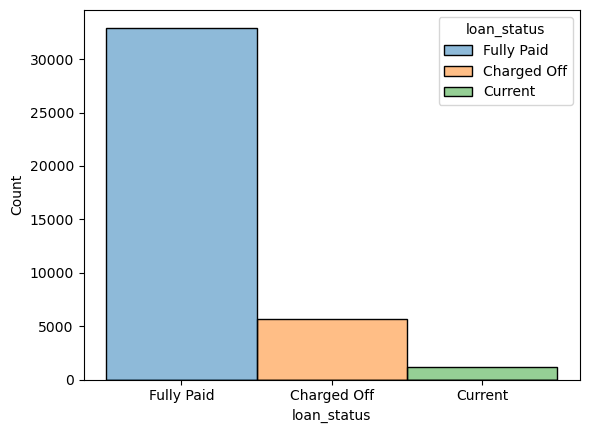

In [188]:
sns.histplot(x='loan_status',data = loan_inp4, hue='loan_status')

In [189]:
loan_inp4.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Bivariate Analysis

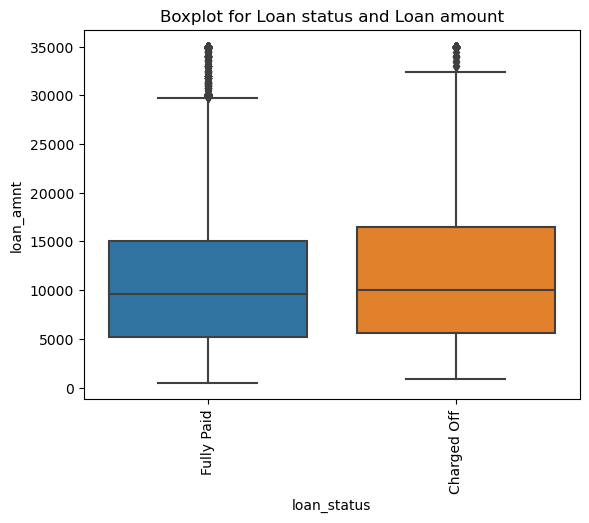

In [190]:
#Box plot
sns.boxplot(x=loan_combined["loan_status"],y=loan_combined['loan_amnt'])
plt.title("Boxplot for Loan status and "+ "Loan amount")
plt.xticks(rotation=90)
plt.show()

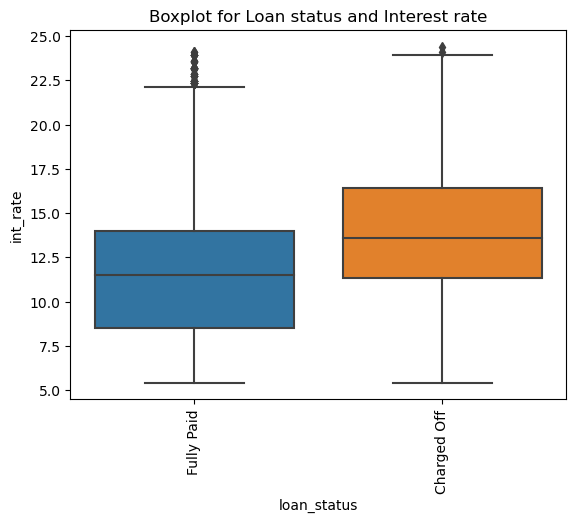

In [191]:
#Box plot
sns.boxplot(x=loan_combined["loan_status"],y=loan_combined['int_rate'])
plt.title("Boxplot for Loan status and "+ "Interest rate")
plt.xticks(rotation=90)
plt.show()

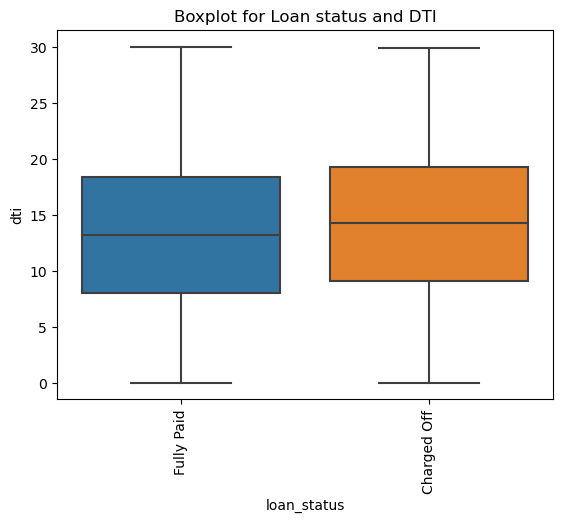

In [192]:
#DTI Box plot
sns.boxplot(x=loan_combined["loan_status"],y=loan_combined['dti'])
plt.title("Boxplot for Loan status and "+ "DTI")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='loan_status', ylabel='Count'>

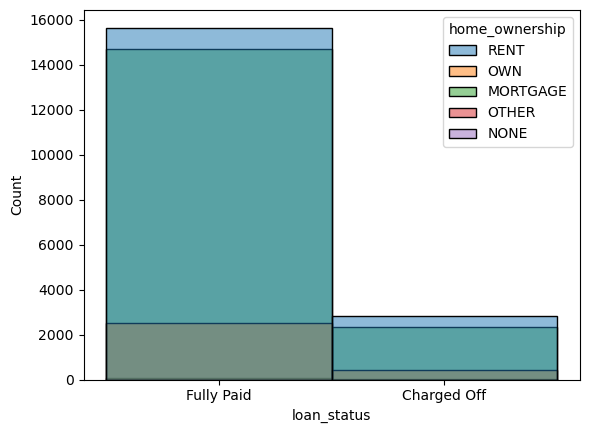

In [193]:
sns.histplot(x='loan_status',data = loan_combined, hue='home_ownership')

In [194]:
loan_chargedoff.home_ownership.value_counts()

RENT        2839
MORTGAGE    2327
OWN          443
OTHER         18
Name: home_ownership, dtype: int64

In [195]:
loan_fullypaid.home_ownership.value_counts()

RENT        15641
MORTGAGE    14694
OWN          2532
OTHER          80
NONE            3
Name: home_ownership, dtype: int64

<Axes: xlabel='loan_status', ylabel='Count'>

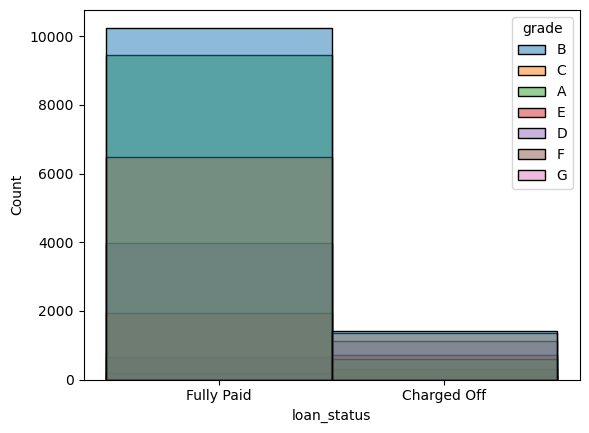

In [196]:
sns.histplot(x='loan_status',data = loan_combined, hue='grade')

In [197]:
loan_chargedoff.grade.value_counts()

B    1425
C    1347
D    1118
E     715
A     602
F     319
G     101
Name: grade, dtype: int64

In [198]:
loan_fullypaid.grade.value_counts()

B    10250
A     9443
C     6487
D     3967
E     1948
F      657
G      198
Name: grade, dtype: int64

In [199]:
loan_combined.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

<Axes: xlabel='loan_status', ylabel='Count'>

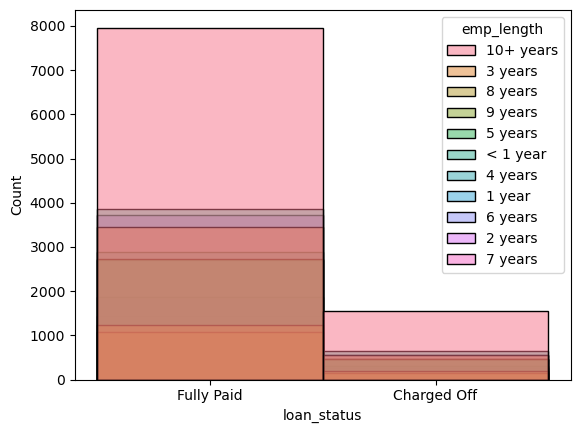

In [200]:
sns.histplot(x='loan_status',data = loan_combined, hue='emp_length')

In [201]:
loan_chargedoff.emp_length.value_counts()

10+ years    1559
< 1 year      639
2 years       567
3 years       555
4 years       462
5 years       458
1 year        456
6 years       307
7 years       263
8 years       203
9 years       158
Name: emp_length, dtype: int64

In [202]:
loan_fullypaid.emp_length.value_counts()

10+ years    7962
< 1 year     3869
2 years      3724
3 years      3457
4 years      2880
5 years      2736
1 year       2713
6 years      1861
7 years      1448
8 years      1232
9 years      1068
Name: emp_length, dtype: int64

In [203]:
loan_combined.emp_length.value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

<Axes: xlabel='loan_status', ylabel='Count'>

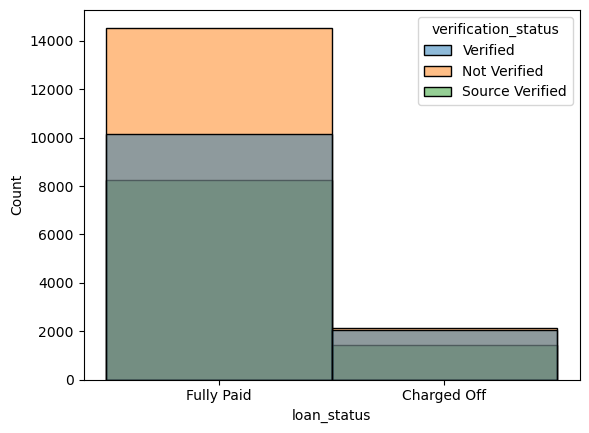

In [204]:
sns.histplot(x='loan_status',data = loan_combined, hue='verification_status')

In [205]:
loan_chargedoff.verification_status.value_counts()

Not Verified       2142
Verified           2051
Source Verified    1434
Name: verification_status, dtype: int64

In [206]:
loan_fullypaid.verification_status.value_counts()

Not Verified       14552
Verified           10155
Source Verified     8243
Name: verification_status, dtype: int64

In [207]:
loan_combined.verification_status.value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

<Axes: xlabel='loan_status', ylabel='Count'>

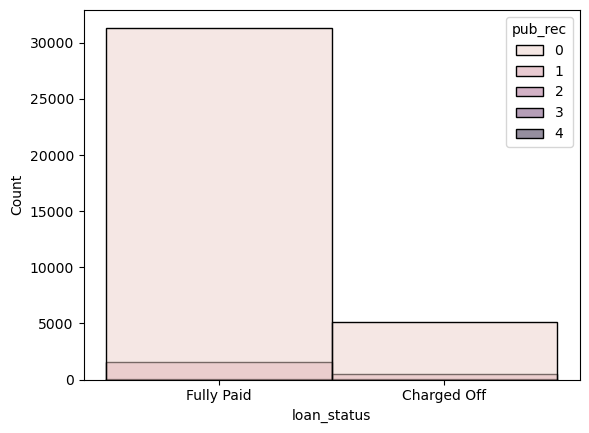

In [208]:
sns.histplot(x='loan_status',data = loan_combined, hue='pub_rec')

In [209]:
loan_chargedoff.pub_rec.value_counts()

0    5160
1     457
2      10
Name: pub_rec, dtype: int64

In [210]:
loan_fullypaid.pub_rec.value_counts()

0    31347
1     1556
2       38
3        7
4        2
Name: pub_rec, dtype: int64

In [211]:
loan_combined.annual_inc.value_counts()

60000.0    1466
50000.0    1029
40000.0     855
45000.0     811
30000.0     808
           ... 
15864.0       1
51669.0       1
53250.0       1
30680.0       1
33990.0       1
Name: annual_inc, Length: 5215, dtype: int64

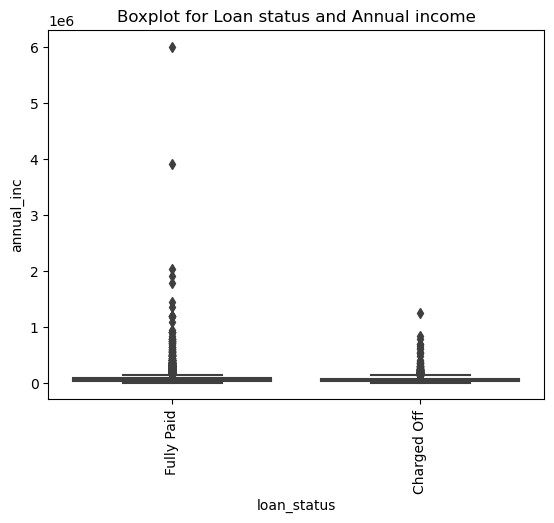

In [212]:
#Box plot
sns.boxplot(x=loan_combined["loan_status"],y=loan_combined['annual_inc'])
plt.title("Boxplot for Loan status and "+ "Annual income")
plt.xticks(rotation=90)
plt.show()

In [213]:
loan_combined.annual_inc.mean()

68777.97368120901

In [214]:
loan_fullypaid['annual_inc'].describe()

count    3.295000e+04
mean     6.986250e+04
std      6.656225e+04
min      4.000000e+03
25%      4.113275e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [215]:
loan_chargedoff['annual_inc'].describe()

count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

In [216]:
loan_combined['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

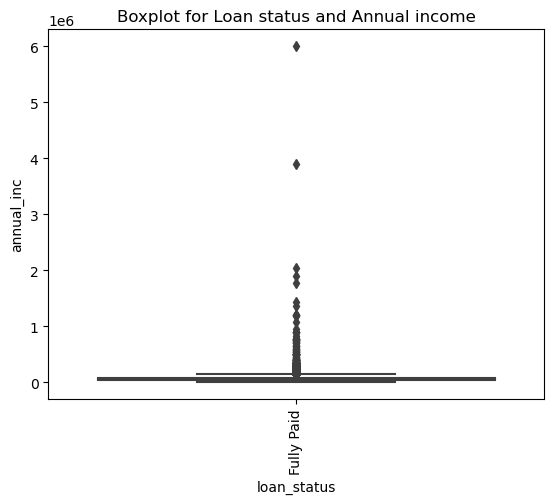

In [217]:
#Box plot
sns.boxplot(x=loan_fullypaid["loan_status"],y=loan_fullypaid['annual_inc'])
plt.title("Boxplot for Loan status and "+ "Annual income")
plt.xticks(rotation=90)
plt.show()

In [218]:
### Handling outliers for Annual income
#### Basis the dataset, considering 95 percentile data for analysis purposes

In [219]:
quan_det = loan_combined.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quan_det

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [220]:
ann_inc_95_per = loan_combined['annual_inc'].quantile(0.95)
loan_combined = loan_combined[loan_combined.annual_inc <= ann_inc_95_per]

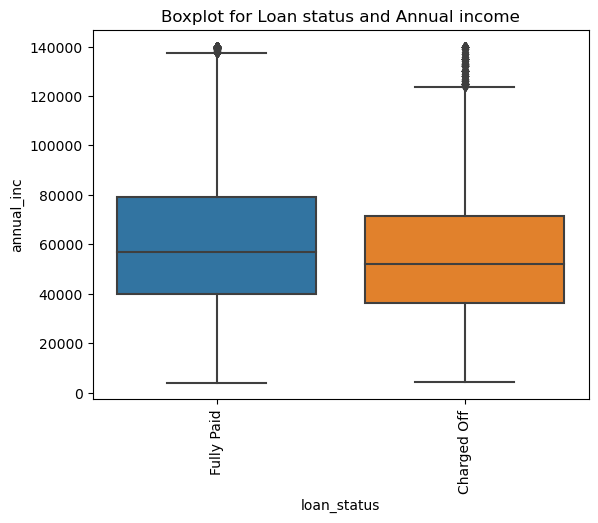

In [221]:
#Box plot
sns.boxplot(x=loan_combined["loan_status"],y=loan_combined['annual_inc'])
plt.title("Boxplot for Loan status and "+ "Annual income")
plt.xticks(rotation=90)
plt.show()

### Correlation 

In [222]:
loan_combined_corr = loan_combined.drop(columns = ['total_pymnt_inv','last_pymnt_amnt','revol_bal','recoveries'])
loan_combined_corr.corr()

,loan_amnt,funded_amnt,term,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,total_pymnt,total_rec_prncp,total_rec_int
loan_amnt,1.000000,0.981942,0.349710,0.291189,0.931481,0.403197,0.090313,0.002544,0.166234,-0.044106,0.239080,0.876654,0.838701,0.727121
funded_amnt,0.981942,1.000000,0.328898,0.296182,0.957113,0.399030,0.089510,0.003082,0.164243,-0.044782,0.233851,0.893295,0.856510,0.735566
term,0.349710,0.328898,1.000000,0.435568,0.091776,0.080212,0.078732,0.046098,0.043481,0.013050,0.092423,0.305764,0.199491,0.508984
int_rate,0.291189,0.296182,0.435568,1.000000,0.269193,0.054022,0.111683,0.133788,-0.007917,0.103767,-0.064017,0.280037,0.163326,0.516210
installment,0.931481,0.957113,0.091776,0.269193,1.000000,0.398193,0.079392,0.001526,0.160925,-0.040177,0.212378,0.853494,0.841047,0.640807
annual_inc,0.403197,0.399030,0.080212,0.054022,0.398193,1.000000,-0.072641,0.030321,0.265207,-0.008935,0.386628,0.382183,0.382874,0.272934
dti,0.090313,0.089510,0.078732,0.111683,0.079392,-0.072641,1.000000,0.008224,0.298322,-0.006893,0.245853,0.086203,0.064181,0.121542
inq_last_6mths,0.002544,0.003082,0.046098,0.133788,0.001526,0.030321,0.008224,1.000000,0.091891,0.026893,0.109351,-0.018918,-0.032350,0.020188
open_acc,0.166234,0.164243,0.043481,-0.007917,0.160925,0.265207,0.298322,0.091891,1.000000,0.005308,0.684071,0.148762,0.147591,0.110252
pub_rec,-0.044106,-0.044782,0.013050,0.103767,-0.040177,-0.008935,-0.006893,0.026893,0.005308,1.000000,-0.017323,-0.047954,-0.060228,0.001782


<Axes: >

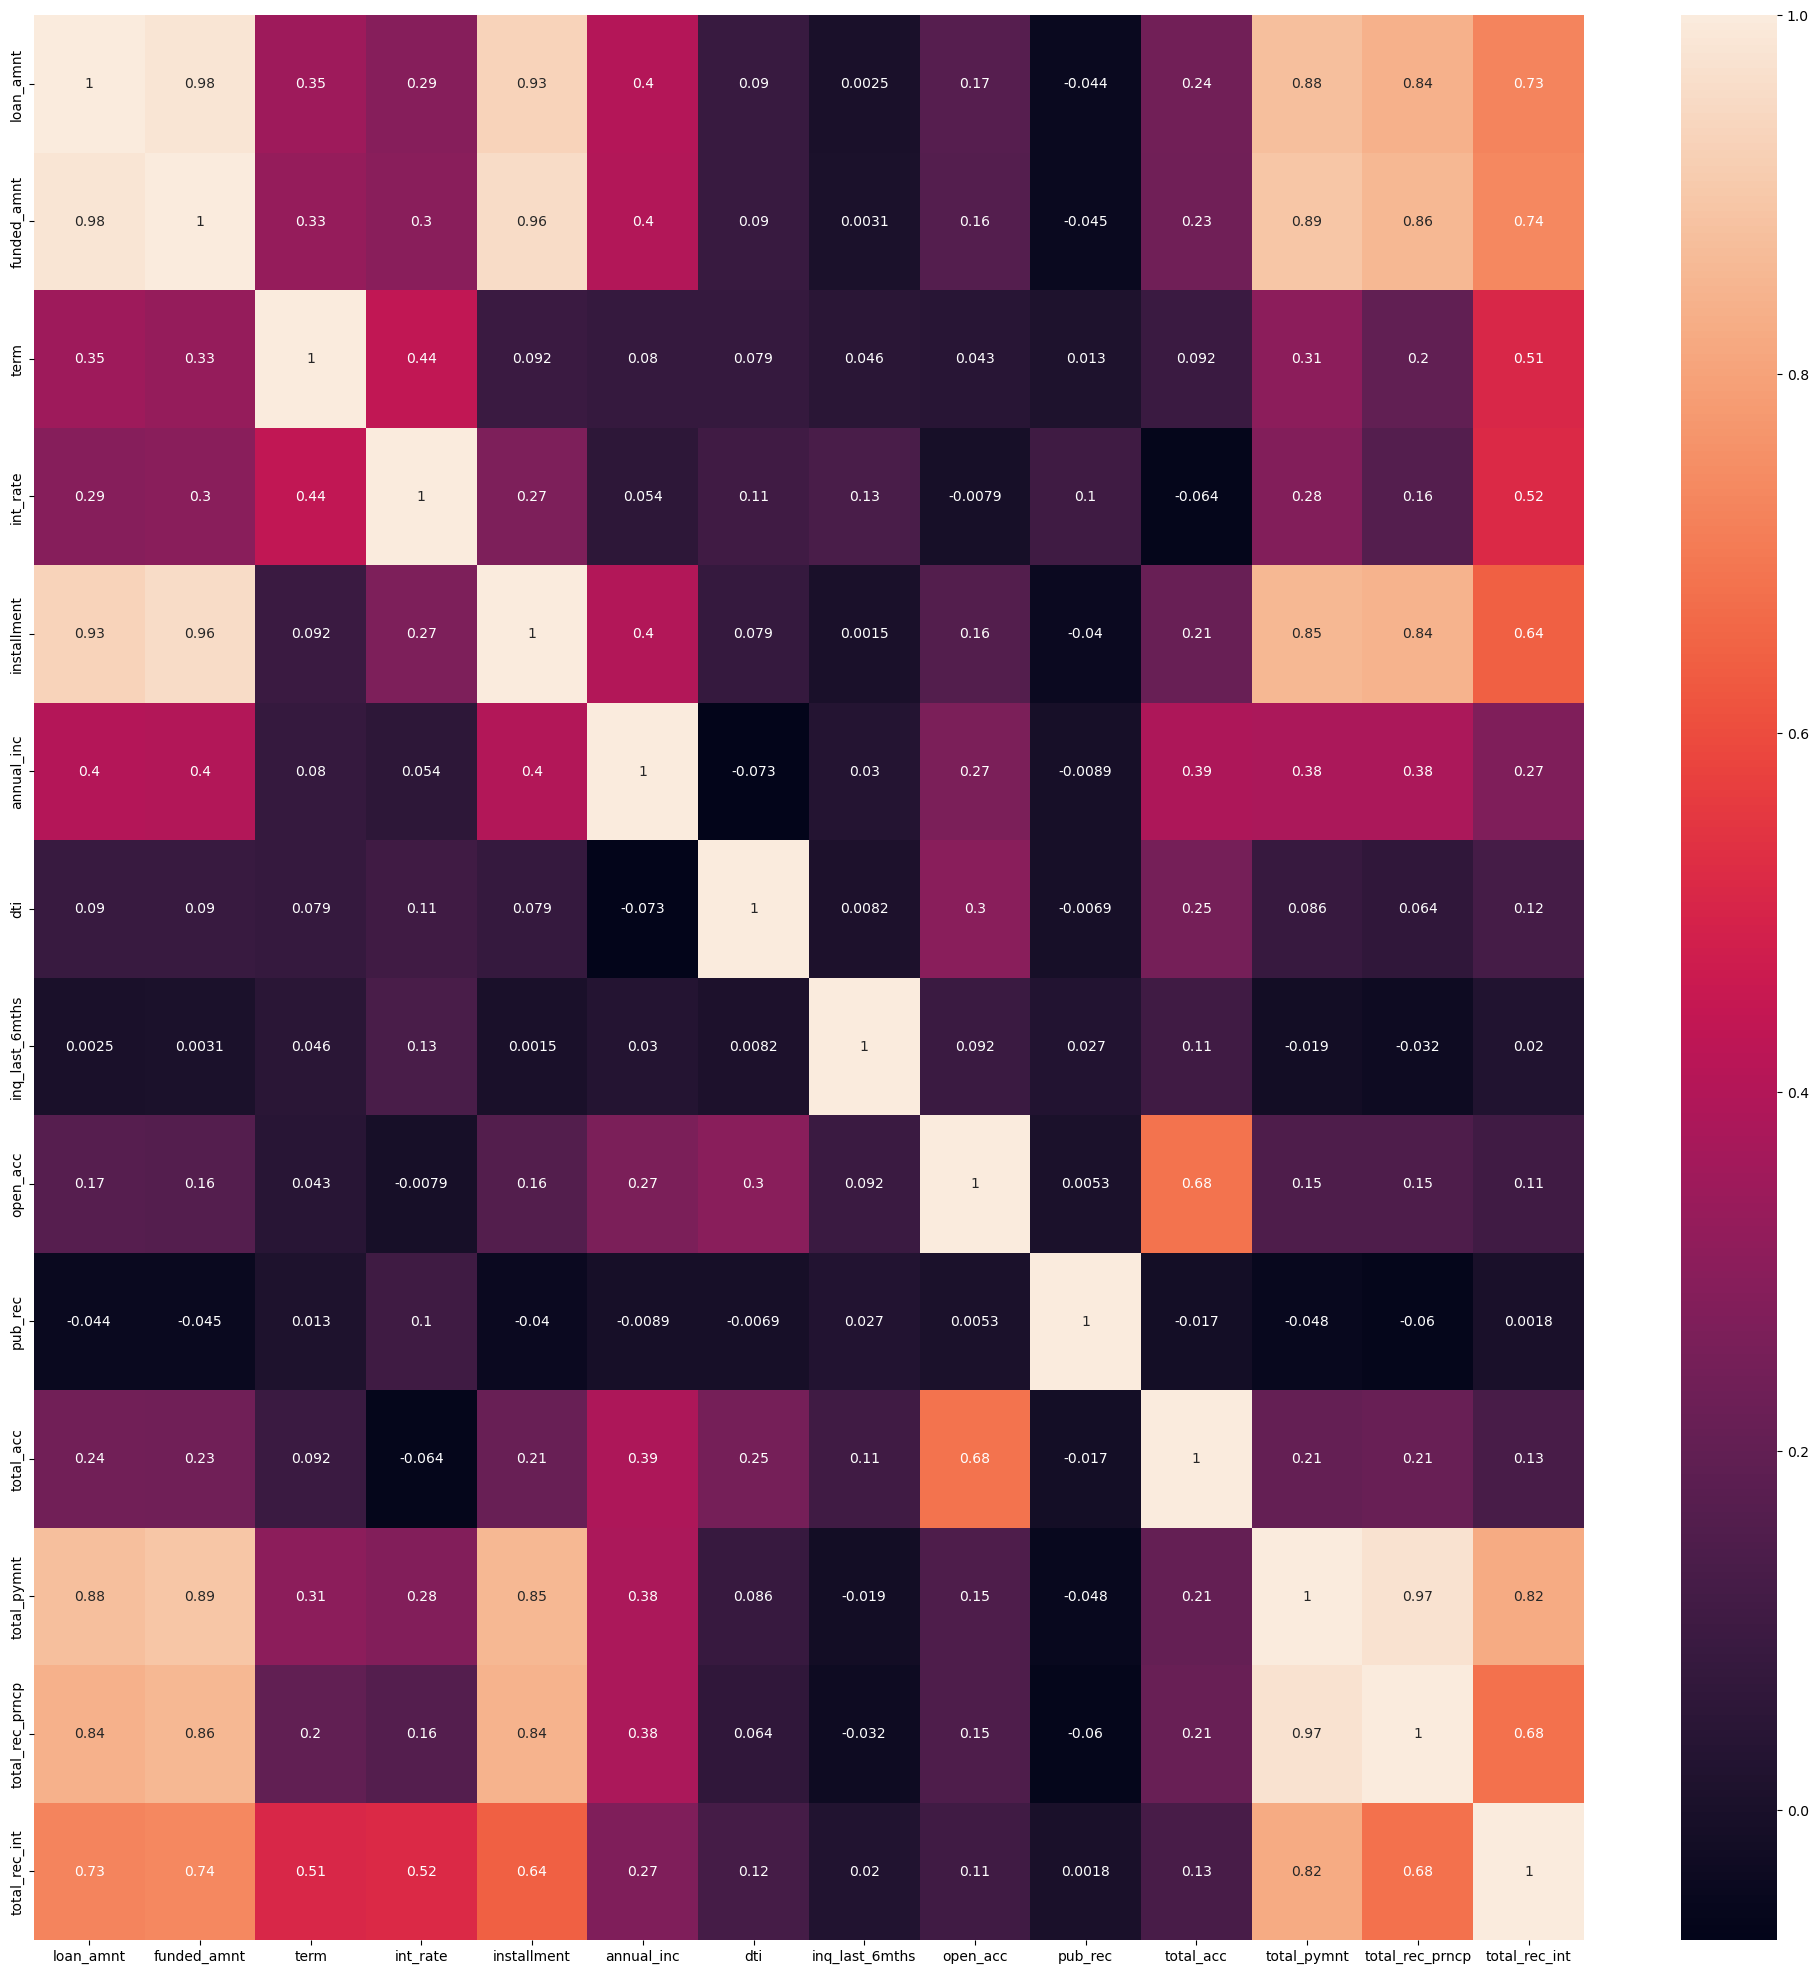

In [223]:
plt.figure(figsize=(25,25))
sns.heatmap(data=loan_combined_corr.corr(),annot=True)